## Showing the relation between $\lambda$ and $L_s$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
no_input=int(input(("Please enter how many inputs of values do you have?")))

print(f"You have {no_input} sets of values. Please enter your values one by one")

You have 4 sets of values. Please enter your values one by one


### For M/M/1

In [3]:
lamda=[]
meu=[]
ro=[]
for i in range (0,no_input):
    divisor=False
    while divisor==False:
        z=float(input(f'Enter value {i+1} of arrival rate'))
        x=float(input(f'Enter value {i+1} of service rate'))
        if ((z/x)<1):
            lamda.append(z)
            meu.append(x)
            ro.append(z/x)
            divisor=True
        else:
            print("The ratio of available rate and service rate must be less than 1. So the value you gave is incorrect.Give correct values")         
print(lamda,meu,ro)

The ratio of available rate and service rate must be less than 1. So the value you gave is incorrect.Give correct values
[20.0, 22.0, 24.0, 26.0] [27.0, 27.0, 27.0, 27.0] [0.7407407407407407, 0.8148148148148148, 0.8888888888888888, 0.9629629629629629]


In [4]:
l_s=[]
for roo in ro:
    y=(roo/(1-roo))
    l_s.append(y)
    
print(l_s)

[2.8571428571428563, 4.399999999999999, 7.9999999999999964, 25.99999999999996]


### Now for M/M/1/N

In [5]:
n=int(input('Give fixed number of services'))
print(f'fixed number of service is {n}')
l_sn=[]

for roo in ro:
    a=(roo*((1-(n+1)*roo**(n))+n*roo**(n+1)))/((1-roo)*(1-roo**(n+1)))
    l_sn.append(a)
print(l_sn)

fixed number of service is 60
[2.8571421732785107, 4.399770952591624, 7.953724053938914, 19.219020125203944]


### Graph without curve fitting

#### Graph of $\lambda$ vs $L_s$

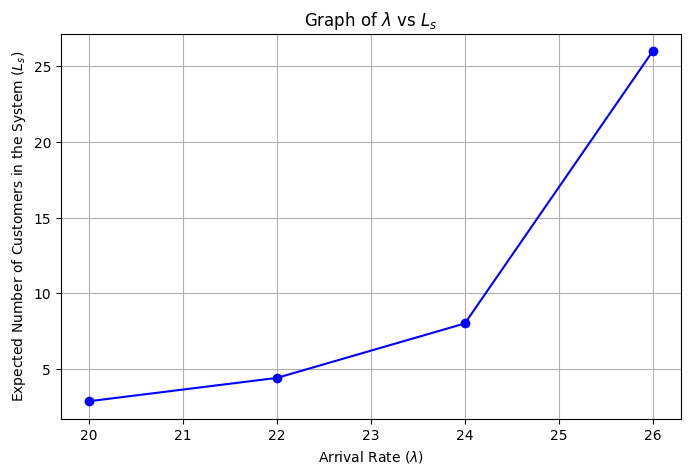

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(lamda, l_s, marker='o', linestyle='-', color='b')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Expected Number of Customers in the System ($L_s$)')
plt.title('Graph of $\lambda$ vs $L_s$')
plt.grid(True)
plt.show()

#### Graph of $\lambda$ vs $L_{s_n}$

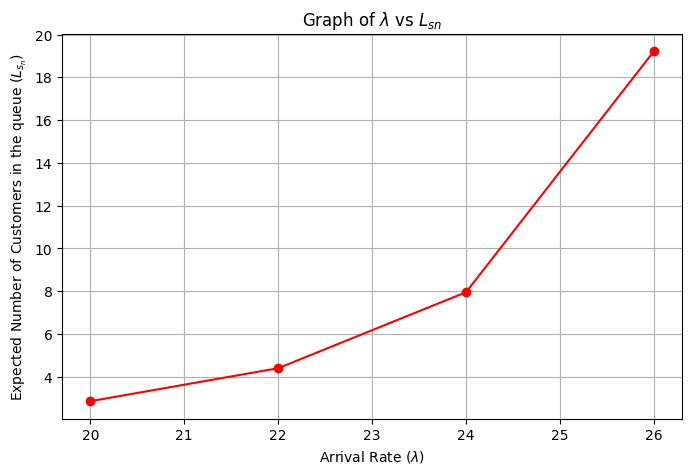

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(lamda, l_sn, marker='o', linestyle='-', color='r')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Expected Number of Customers in the queue ($L_{s_n}$)')
plt.title('Graph of $\lambda$ vs $L_{sn}$')
plt.grid(True)
plt.show()

### PLOTTING AND FITTING THE CURVE

#### Graph of $\lambda$ vs $L_s$

C:\Users\user\AppData\Local\Temp\ipykernel_26096\1581807314.py:2: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(lamda, l_s, degree)


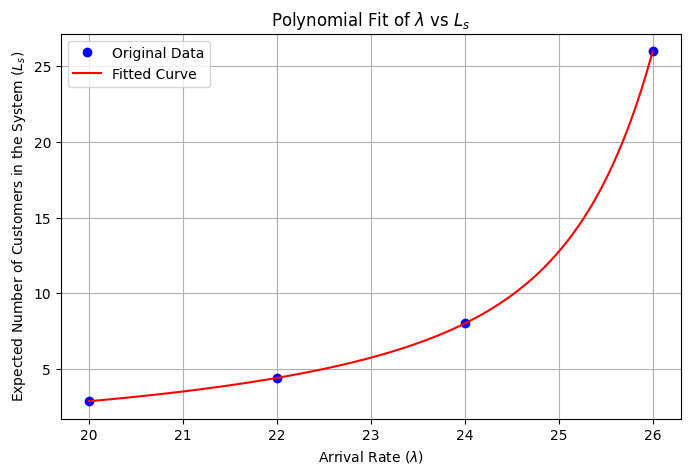

In [10]:

degree = 50
coeffs = np.polyfit(lamda, l_s, degree)
polynomial = np.poly1d(coeffs)

# fitting curve ko lagi
lamda_fine = np.linspace(min(lamda), max(lamda), 100)
l_s_fitted = polynomial(lamda_fine)

plt.figure(figsize=(8, 5))
plt.plot(lamda, l_s, 'bo', label='Original Data')
plt.plot(lamda_fine, l_s_fitted, 'r-', label='Fitted Curve')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Expected Number of Customers in the System ($L_s$)')
plt.title('Polynomial Fit of $\lambda$ vs $L_s$')
plt.legend()
plt.grid(True)
plt.show()

#### Graph of $\lambda$ vs $L_{s_n}$

C:\Users\user\AppData\Local\Temp\ipykernel_26096\3959033233.py:2: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(lamda, l_sn, degree)


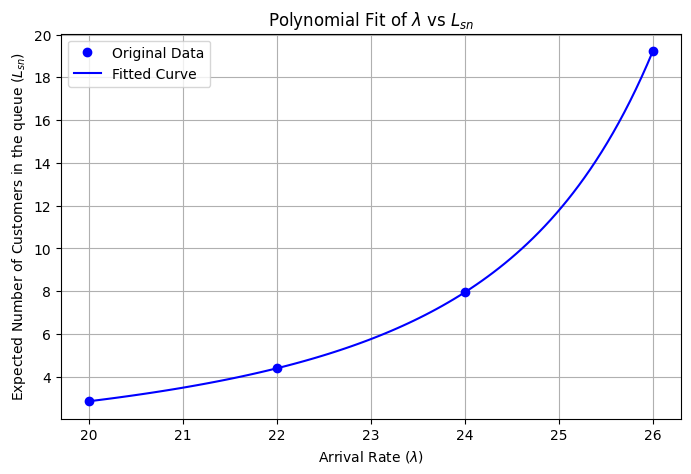

In [11]:
degree = 50
coeffs = np.polyfit(lamda, l_sn, degree)
polynomial = np.poly1d(coeffs)
# fitting curve ko lagi
lamda_fine2 = np.linspace(min(lamda), max(lamda), 100)
l_sn_fitted = polynomial(lamda_fine2)

plt.figure(figsize=(8, 5))
plt.plot(lamda, l_sn, 'bo', label='Original Data')
plt.plot(lamda_fine2, l_sn_fitted, 'b-', label='Fitted Curve')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Expected Number of Customers in the queue ($L_{sn}$)')
plt.title('Polynomial Fit of $\lambda$ vs $L_{sn}$')
plt.legend()
plt.grid(True)
plt.show()

### Table of values $\lambda$ vs $L_s$ vs $L_{sn}$

In [12]:
print(f"lambda\t|\tL_s\t|\tL_sn")
for lam,ser,que in zip(lamda,l_s,l_sn):
    print(f"{lam:.3f}\t|\t{ser:.3f}\t|\t{que:.3f}")

lambda	|	L_s	|	L_sn
20.000	|	2.857	|	2.857
22.000	|	4.400	|	4.400
24.000	|	8.000	|	7.954
26.000	|	26.000	|	19.219


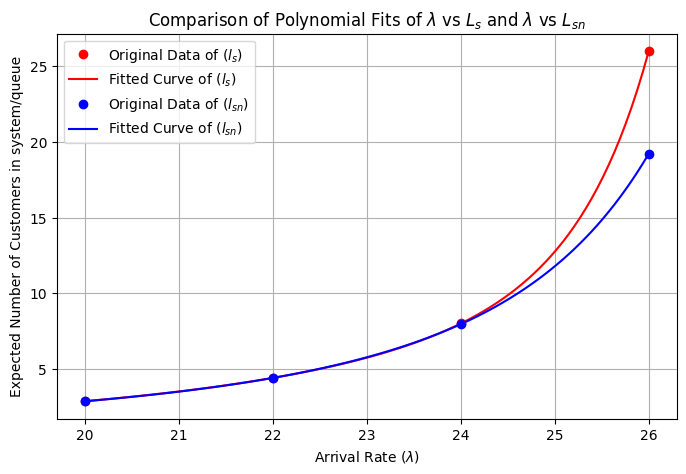

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(lamda, l_s, 'ro', label='Original Data of ($l_s$)')
plt.plot(lamda_fine, l_s_fitted, 'r-', label='Fitted Curve of ($l_s$)')
plt.plot(lamda, l_sn, 'bo', label='Original Data of ($l_{sn}$)')
plt.plot(lamda_fine2, l_sn_fitted, 'b-', label='Fitted Curve of ($l_{sn}$)')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Expected Number of Customers in system/queue')
plt.title('Comparison of Polynomial Fits of $\lambda$ vs $L_s$ and $\lambda$ vs $L_{sn}$')
plt.legend()
plt.grid(True)
plt.show()

### fit of exponential values

In [14]:
exp_lamda=[]
exp_l_s=[]
exp_l_q=[]

for lam,ser,que in zip(lamda,l_s,l_sn):
    exp_lamda.append(np.exp(lam))
    exp_l_s.append(np.exp(ser))
    exp_l_q.append(np.exp(que))
    
    
print(exp_lamda,exp_l_s,exp_l_s)

[485165195.4097903, 3584912846.131592, 26489122129.84347, 195729609428.83878] [17.411708063327637, 81.450868664968, 2980.957987041718, 195729609428.83112] [17.411708063327637, 81.450868664968, 2980.957987041718, 195729609428.83112]


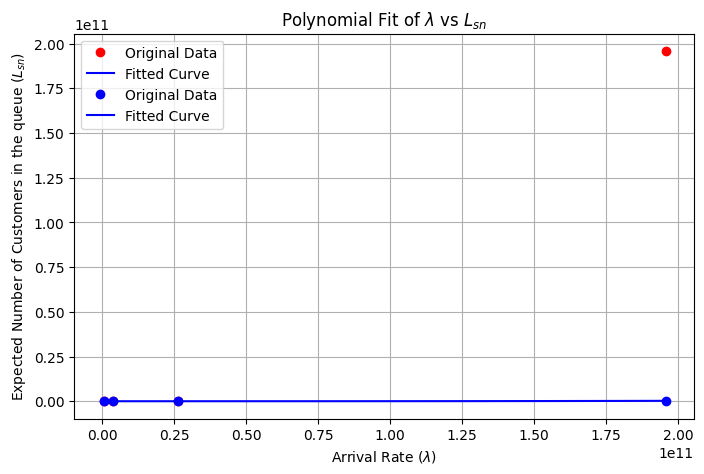

In [15]:
degree = 3
coeffs = np.polyfit(exp_lamda, exp_l_q, degree)
polynomial = np.poly1d(coeffs)
# fitting curve ko lagi
lamda_fine_exp = np.linspace(min(exp_lamda), max(exp_lamda), 100)
l_s_fitted_exp = polynomial(lamda_fine_exp)
lamda_fine_exp2 = np.linspace(min(lamda), max(lamda), 100)
l_q_fitted_exp = polynomial(lamda_fine_exp2)
plt.figure(figsize=(8, 5))
plt.plot(exp_lamda, exp_l_s, 'ro', label='Original Data')
plt.plot(lamda_fine_exp, l_s_fitted_exp, 'b-', label='Fitted Curve')
plt.plot(exp_lamda, exp_l_q, 'bo', label='Original Data')
plt.plot(lamda_fine_exp2, l_q_fitted_exp, 'b-', label='Fitted Curve')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Expected Number of Customers in the queue ($L_{sn}$)')
plt.title('Polynomial Fit of $\lambda$ vs $L_{sn}$')
plt.legend()
plt.grid(True)
plt.show()

### Clustered Plot of $\lambda$ vs $L_s$ , $L_q$

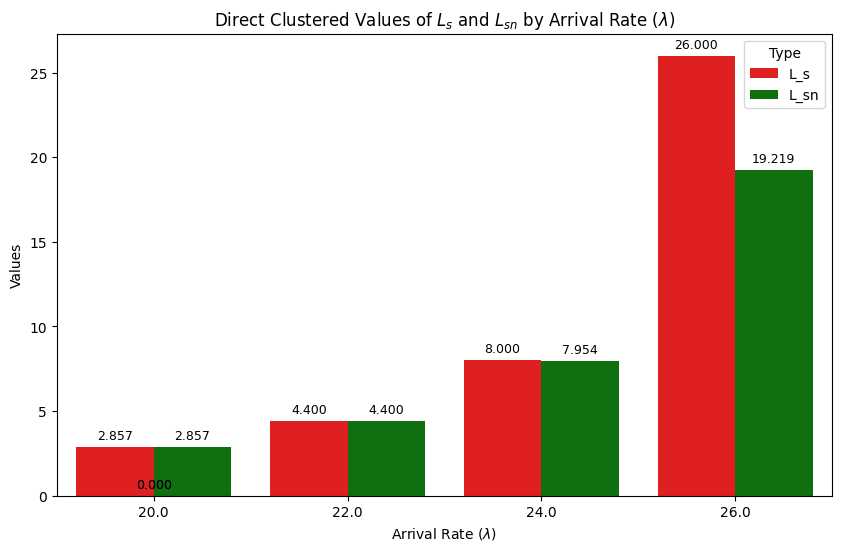

In [16]:
import seaborn as sns
import pandas as pd
data_direct = pd.DataFrame({
    'Lambda': lamda,
    'L_s': l_s,
    'L_sn': l_sn
})

data_melted_direct = data_direct.melt(id_vars=["Lambda"], value_vars=["L_s", "L_sn"], var_name="Type", value_name="Value")

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Lambda", y="Value", hue="Type", data=data_melted_direct, palette=['red', 'green'])
plt.title('Direct Clustered Values of $L_s$ and $L_{sn}$ by Arrival Rate ($\lambda$)')
plt.xlabel('Arrival Rate ($\lambda$)')
plt.ylabel('Values')

for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.3f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      size=9, xytext = (0, 8), 
                      textcoords = 'offset points')

plt.show()